# BEE 4750 Homework 5: Mixed Integer and Stochastic Programming

**Name**: Annie Stewart and Lauren Servia

**ID**:

> **Due Date**
>
> Thursday, 12/05/24, 9:00pm

## Overview

### Instructions

-   In Problem 1, you will use mixed integer programming to solve a
    waste load allocation problem.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\19193\Desktop\BEE4750\hw\hw5-annielauren`
   Installed LERC_jll ───────────── v4.0.0+0
   Installed GR_jll ─────────────── v0.73.8+0
   Installed JpegTurbo_jll ──────── v3.0.4+0
   Installed MutableArithmetics ─── v1.5.2
   Installed LoggingExtras ──────── v1.1.0
   Installed OffsetArrays ───────── v1.14.1
   Installed Cairo_jll ──────────── v1.18.2+1
   Installed PlotUtils ──────────── v1.4.3
   Installed StaticArrays ───────── v1.9.8
   Installed NetworkLayout ──────── v0.4.7
   Installed HTTP ───────────────── v1.10.10
   Installed DataFrames ─────────── v1.7.0
   Installed Libgpg_error_jll ───── v1.50.0+0
   Installed HiGHS_jll ──────────── v1.8.1+0
   Installed FFMPEG ─────────────── v0.4.2
   Installed Bzip2_jll ──────────── v1.0.8+2
   Installed SentinelArrays ─────── v1.4.7
   Installed CodecBzip2 ─────────── v0.8.4
   Installed XZ_jll ─────────────── v5.6.3+0
   Installed LZO_jll ────────────── v2.10.2+1
   Installed PlotThemes ─────────── v3.

In [2]:
using JuMP
using HiGHS
using DataFrames
using GraphRecipes
using Plots
using Measures
using MarkdownTables

## Problems (Total: 30 Points)

### Problem 1 (30 points)

Three cities are developing a coordinated municipal solid waste (MSW)
disposal plan. Three disposal alternatives are being considered: a
landfill (LF), a materials recycling facility (MRF), and a
waste-to-energy facility (WTE). The capacities of these facilities and
the fees for operation and disposal are provided below.

-   **LF**: Capacity 200 Mg, fixed cost \$2000/day, tipping cost
    \$50/Mg;
-   **MRF**: Capacity 350 Mg, fixed cost \$1500/day, tipping cost
    \$7/Mg, recycling cost \$40/Mg recycled;
-   **WTE**: Capacity 210 Mg, fixed cost \$2500/day, tipping cost
    \$60/Mg;

The MRF recycling rate is 40%, and the ash fraction of non-recycled
waste is 16% and of recycled waste is 14%. Transportation costs are
\$1.5/Mg-km, and the relative distances between the cities and
facilities are provided in the table below.

| **City/Facility** | **Landfill (km)** | **MRF (km)** | **WTE (km)** |
|:-----------------:|:-----------------:|:------------:|:------------:|
|         1         |         5         |      30      |      15      |
|         2         |        15         |      25      |      10      |
|         3         |        13         |      45      |      20      |
|        LF         |        \-         |      32      |      18      |
|        MRF        |        32         |      \-      |      15      |
|        WTE        |        18         |      15      |      \-      |

The fixed costs associated with the disposal options are incurred only
if the particular disposal option is implemented. The three cities
produce 100, 90, and 120 Mg/day of solid waste, respectively, with the
composition provided in the table below.

**Reminder**: Use `round(x; digits=n)` to report values to the
appropriate precision!

**In this problem**:

-   Formulate the waste load allocation problem and implement it in
    `JuMP`.
-   Draw a diagram showing the flows of waste between the cities and the
    facilities. Which facilities (if any) will not be used? Does this
    solution make sense?

#### Input Parameters
##### General Variables and Associated Data
- Number of cities, num_cities = 3 [cities]
   - sw_production_c1 = 100 [Mg/day]
   - sw_production_c2 = 90 [Mg/day]
   - sw_production_c3 = 120 [Mg/day]
- Number of disposal alternatives = 3 [disposal alternatives]
   1) LF = landfill
   2) MRF = materials recyclying facility
   3) WTE = waste-to-energy facility
- transport_cost = 1.5 [$/(Mg*km)]
- i = city i
- j = waste facility j
- allocation_waste[i_1:i_3, j_1:j_3] = waste load allocations for city 1, city 2, city 3, and for facilities LF, MRF, and WTE.


##### LF Associated Data
- c_LF = 200 [Mg]
- fc_LF = 2000 [$/day]
- tip_cost_LF = 50 [$/Mg]


##### MRF Associated Data
- c_MRF = 350 [Mg]
- fc_MRF = 1500 [$/day]
- tip_cost_MRF = 7 [$/Mg]
- recyc_cost_MRF = 40 [$/Mg]
- recyc_rate_MRF = 0.4 [dimensionless]
- f_ash_nonrecyc_MRF = 0.16 [dimensionless]
- f_ash_nonrecyc_MRF = 0.14 [dimensionless]


##### WTE Associated Data
-  c_WTE = 210 [Mg]
- fixed cost = 2500 [$/day]
- tip_cost_WTE = 60 [$/Mg]


Running HiGHS 1.8.1 (git hash: 4a7f24ac6): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [6e+01, 1e+02]
  Bound  [0e+00, 0e+00]
  RHS    [9e+01, 4e+02]
Presolving model
4 rows, 6 cols, 9 nonzeros  0s
1 rows, 2 cols, 2 nonzeros  0s
Presolve : Reductions: rows 1(-5); columns 2(-7); elements 2(-16)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          1     2.2216428571e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 1
Objective value     :  2.2216428571e+04
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00
Total cost for the waste loads allocation model = 22216.428571428572dollars
City 1 -> Facility 1 = 80.0 [Mg]
City 1 -> Facility 2 = 20.0 [Mg]
City 1 -> Facility 3 = 0.0 [Mg]
City 2 -> Facility 1 = 0.0 [Mg]


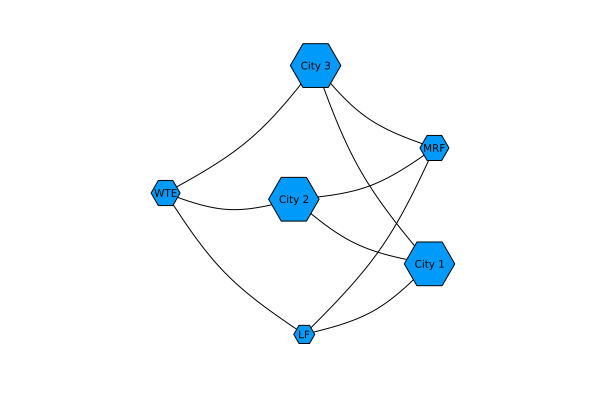

In [4]:

# Initialize GLPK model for waste loads allocation
waste_model = Model(HiGHS.Optimizer)

# Initialize variables (decision variables for waste loads)
@variable(waste_model, allocation_load[1:3, 1:3] >= 0) # non-negativity constraint

# Distances between cities and waste facilities
distances = DataFrame(
    LF = [5, 15, 13],     # LF distances for City 1, 2, 3
    MRF = [30, 25, 45],   # MRF distances for City 1, 2, 3
    WTE = [15, 10, 20]    # WTE distances for City 1, 2, 3
)

# Constants (fixed costs, capacities, etc.)
transport_cost = 1.5  # [$/(Mg*km)]

# LF Associated Data
c_LF = 200            # [Mg]
fc_LF = 2000          # [$/day]
tip_cost_LF = 50      # [$/Mg]

# MRF Associated Data
c_MRF = 350           # [Mg]
fc_MRF = 1500         # [$/day]
tip_cost_MRF = 7      # [$/Mg]
recyc_cost_MRF = 40   # [$/Mg]
recyc_rate_MRF = 0.4  # [dimensionless]
f_ash_nonrecyc_MRF = 0.16  # [dimensionless]

# WTE Associated Data
c_WTE = 210           # [Mg]
fc_WTE = 2500         # [$/day]
tip_cost_WTE = 60     # [$/Mg]

# Objective function: Minimize the total cost
@objective(waste_model, Min,
    sum(allocation_load[i, j] * transport_cost * distances[i, j] for i in 1:3, j in 1:3) + 
    sum(allocation_load[1:3, 1] * fc_LF / c_LF) + 
    sum(allocation_load[1:3, 2] * fc_MRF / c_MRF) +
    sum(allocation_load[1:3, 3] * fc_WTE / c_WTE) + 
    sum(allocation_load[1:3, 1] * tip_cost_LF) + 
    sum(allocation_load[1:3, 2] * (tip_cost_MRF + recyc_cost_MRF * recyc_rate_MRF)) + 
    sum(allocation_load[1:3, 3] * tip_cost_WTE)
)

# Constraints
# Total waste produced by each city
@constraint(waste_model, sum(allocation_load[1, 1:3]) == 100)  # City 1 produces 100 Mg/day
@constraint(waste_model, sum(allocation_load[2, 1:3]) == 90)   # City 2 produces 90 Mg/day
@constraint(waste_model, sum(allocation_load[3, 1:3]) == 120)  # City 3 produces 120 Mg/day

# Maximum capacity for each facility
@constraint(waste_model, sum(allocation_load[1:3, 1]) <= c_LF)  # LF capacity
@constraint(waste_model, sum(allocation_load[1:3, 2]) <= c_MRF) # MRF capacity
@constraint(waste_model, sum(allocation_load[1:3, 3]) <= c_WTE) # WTE capacity

# Optimize the model
optimize!(waste_model)

# Display results
println("Total cost for the waste loads allocation model = ", objective_value(waste_model), "dollars")

# Display the allocation of waste between cities and facilities
for i in 1:3
    for j in 1:3
        println("City ", i, " -> Facility ", j, " = ", value(allocation_load[i, j]), " [Mg]")
    end
end

# Plot the waste allocation using a graph
allocated_waste = [value(allocation_load[i, j]) for i in 1:3, j in 1:3]

# Matrix for empty connections
empty_matrix = [
    0 1 1 1 0 0;
    1 0 0 0 1 1;
    1 0 0 0 1 1;
    1 0 0 0 1 1;
    0 1 1 1 0 0;
    0 1 1 1 0 0
]

# Names for cities and facilities
names = ["City 1", "City 2", "City 3", "LF", "MRF", "WTE"]

# Visualize the flows
graphplot(empty_matrix, names=names, line_width=allocated_waste / (maximum(allocated_waste)*10), legend=false)



The output of the model gives: 

|     **City**      | **Landfill (Mg)** | **MRF (Mg)** | **WTE (Mg)** |
|:-----------------:|:-----------------:|:------------:|:------------:|
|         1         |        80         |      20      |       0      |
|         2         |        90         |       0      |       0      |
|         3         |       120         |       0      |       0      |

As shown in the table, all three cities use the landfill. This makes sense because it is usually the least expensive option due to lower tipping costs. Only City 1 uses the MRF. WTE is not used by any city, which makes sense because of the high tipping costs ($60/Mg) make it make less economic sense, especially since recycling (MRF) is much cheaper (hence City 1 using MRF instead of WTE).



## References

List any external references consulted, including classmates.